In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay , classification_report, accuracy_score, precision_recall_curve
from imblearn.over_sampling import SMOTE



## Loading Data

In [2]:
dataset = pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')
dataset.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0



1. **male**: This tells us if the person is male or not. It uses numbers where 1 means 'yes' and 0 means 'no'.

2. **age**: This is the age of the person, shown as a whole number.

3. **education**: This is the level of education the person has completed, like high school or college.

4. **currentSmoker**: This shows if the person currently smokes cigarettes. It's also shown as 1 for 'yes' and 0 for 'no'.

5. **cigsPerDay**: This tells us how many cigarettes the person smokes in one day on average.

6. **BPMeds**: This shows if the person is taking any medicine for blood pressure. Again, 1 means 'yes' and 0 means 'no'.

7. **prevalentStroke**: This tells us if the person has had a stroke before. It uses 1 for 'yes' and 0 for 'no'.

8. **prevalentHyp**: This indicates if the person has had high blood pressure before. It's shown as 1 for 'yes' and 0 for 'no'.

9. **diabetes**: This shows if the person has diabetes. It uses 1 for 'yes' and 0 for 'no'.

10. **totChol**: This is the total cholesterol level in the person's blood.

11. **sysBP**: This is the systolic blood pressure, which is the higher number in blood pressure readings.

12. **diaBP**: This is the diastolic blood pressure, which is the lower number in blood pressure readings.

13. **BMI**: This stands for Body Mass Index, a number that tells us about the person's body fat based on height and weight.

14. **heartRate**: This is how fast the person's heart beats in one minute.

15. **glucose**: This is the level of sugar in the person's blood.

16. **TenYearCHD**: This shows if the person has a risk of getting heart disease in the next ten years. It uses 1 for 'yes' and 0 for 'no'.


## Information from the database

**Dataset dimensions:**

In [3]:
dataset.shape

(4238, 16)

**Columns in the dataset :**

In [4]:
dataset.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
data = [
    {'Type': 'Numerical', 'Column': 'age'},
    {'Type': 'Numerical', 'Column': 'cigsPerDay'},
    {'Type': 'Numerical', 'Column': 'totChol'},
    {'Type': 'Numerical', 'Column': 'sysBP'},
    {'Type': 'Numerical', 'Column': 'diaBP'},
    {'Type': 'Numerical', 'Column': 'BMI'},
    {'Type': 'Numerical', 'Column': 'heartRate'},
    {'Type': 'Numerical', 'Column': 'glucose'},
    {'Type': 'Categorical', 'Column': 'male'},
    {'Type': 'Categorical', 'Column': 'education'},
    {'Type': 'Categorical', 'Column': 'currentSmoker'},
    {'Type': 'Categorical', 'Column': 'BPMeds'},
    {'Type': 'Categorical', 'Column': 'prevalentStroke'},
    {'Type': 'Categorical', 'Column': 'prevalentHyp'},
    {'Type': 'Categorical', 'Column': 'diabetes'}
]

pd.DataFrame(data)



,Type,Column
0,Numerical,age
1,Numerical,cigsPerDay
2,Numerical,totChol
3,Numerical,sysBP
4,Numerical,diaBP
5,Numerical,BMI
6,Numerical,heartRate
7,Numerical,glucose
8,Categorical,male
9,Categorical,education


**The data type of each column :**

In [6]:
dataset.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

**Number of Null in each column :**

In [7]:
(dataset.isnull()).sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
np.isinf(dataset).sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
pd.DataFrame({
    'number of null': dataset.isnull().sum(),
    'type': dataset.dtypes
})

,number of null,type
male,0,int64
age,0,int64
education,105,float64
currentSmoker,0,int64
cigsPerDay,29,float64
BPMeds,53,float64
prevalentStroke,0,int64
prevalentHyp,0,int64
diabetes,0,int64
totChol,50,float64


**Descriptive statistics :**

In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


**Plot the distribution for all features:**

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

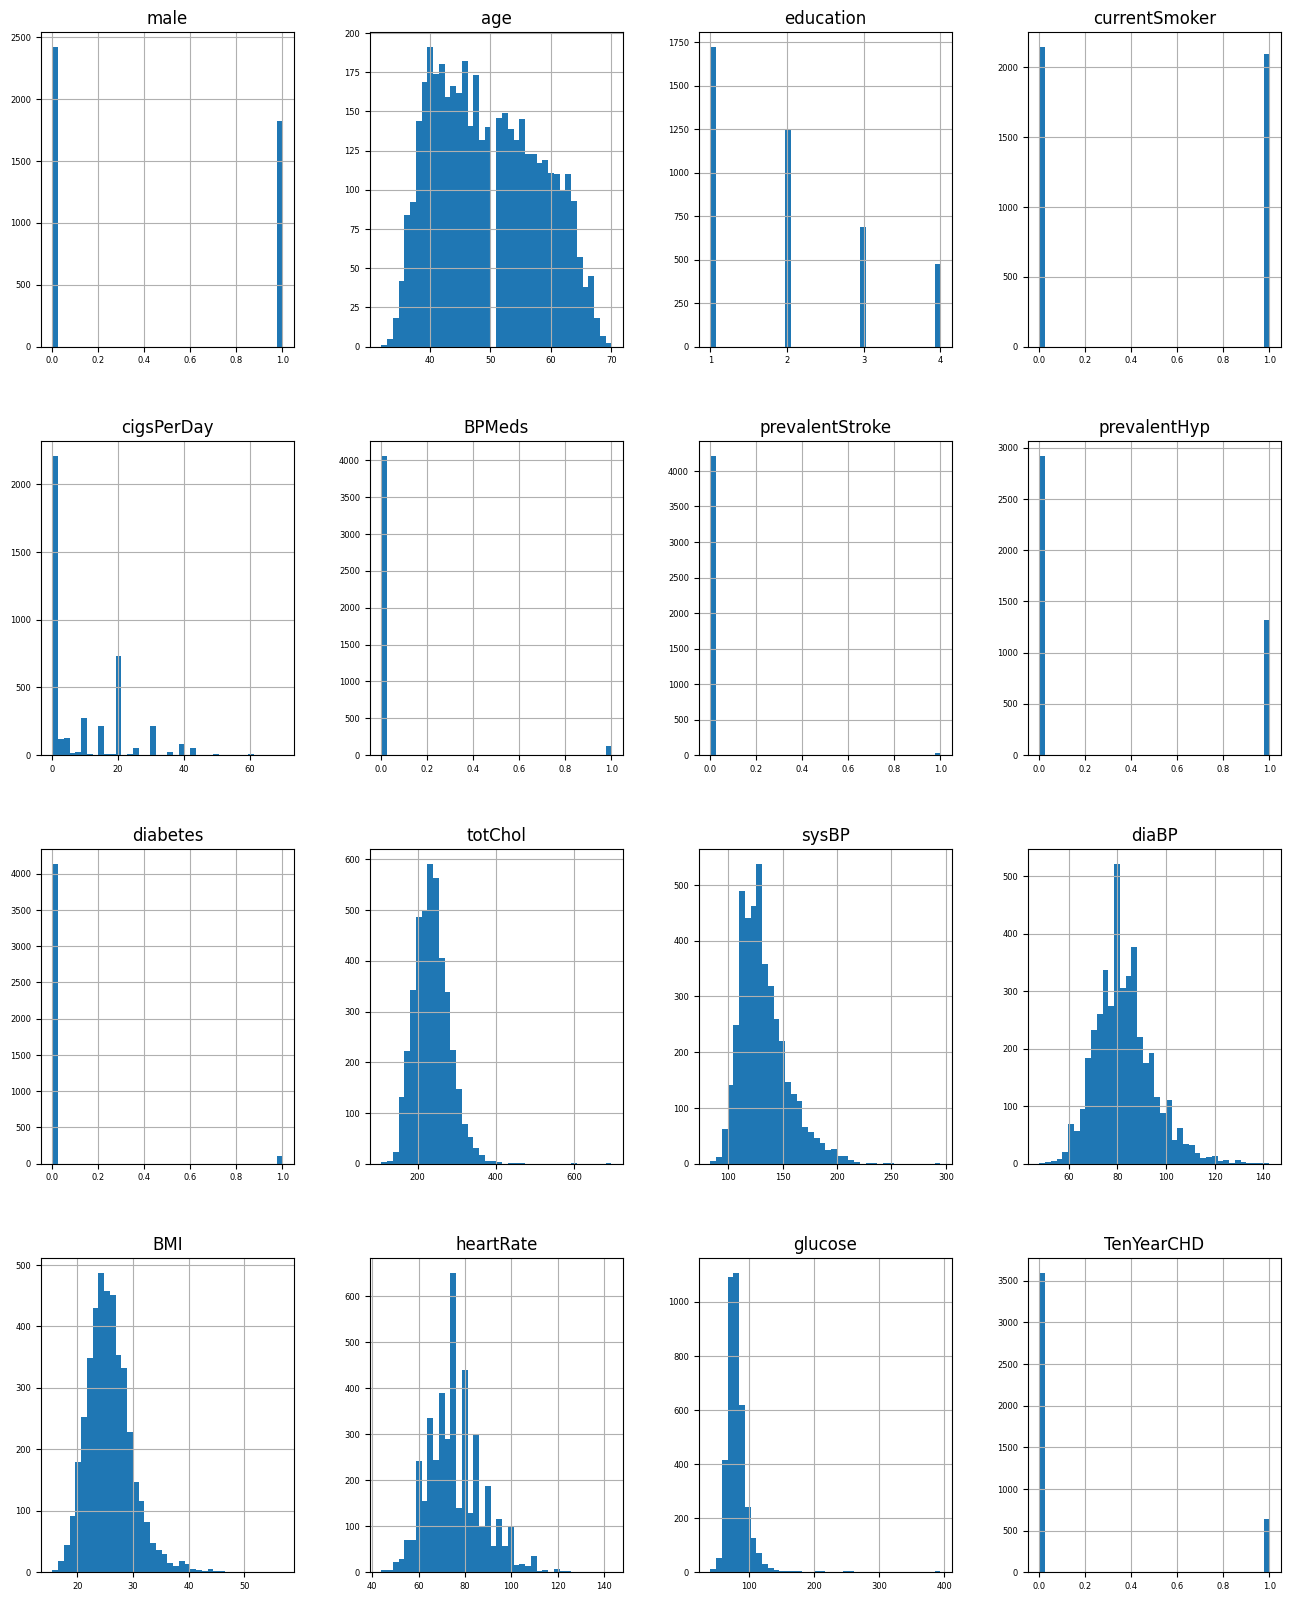

In [11]:
dataset.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6)

**Multicollinearity:**

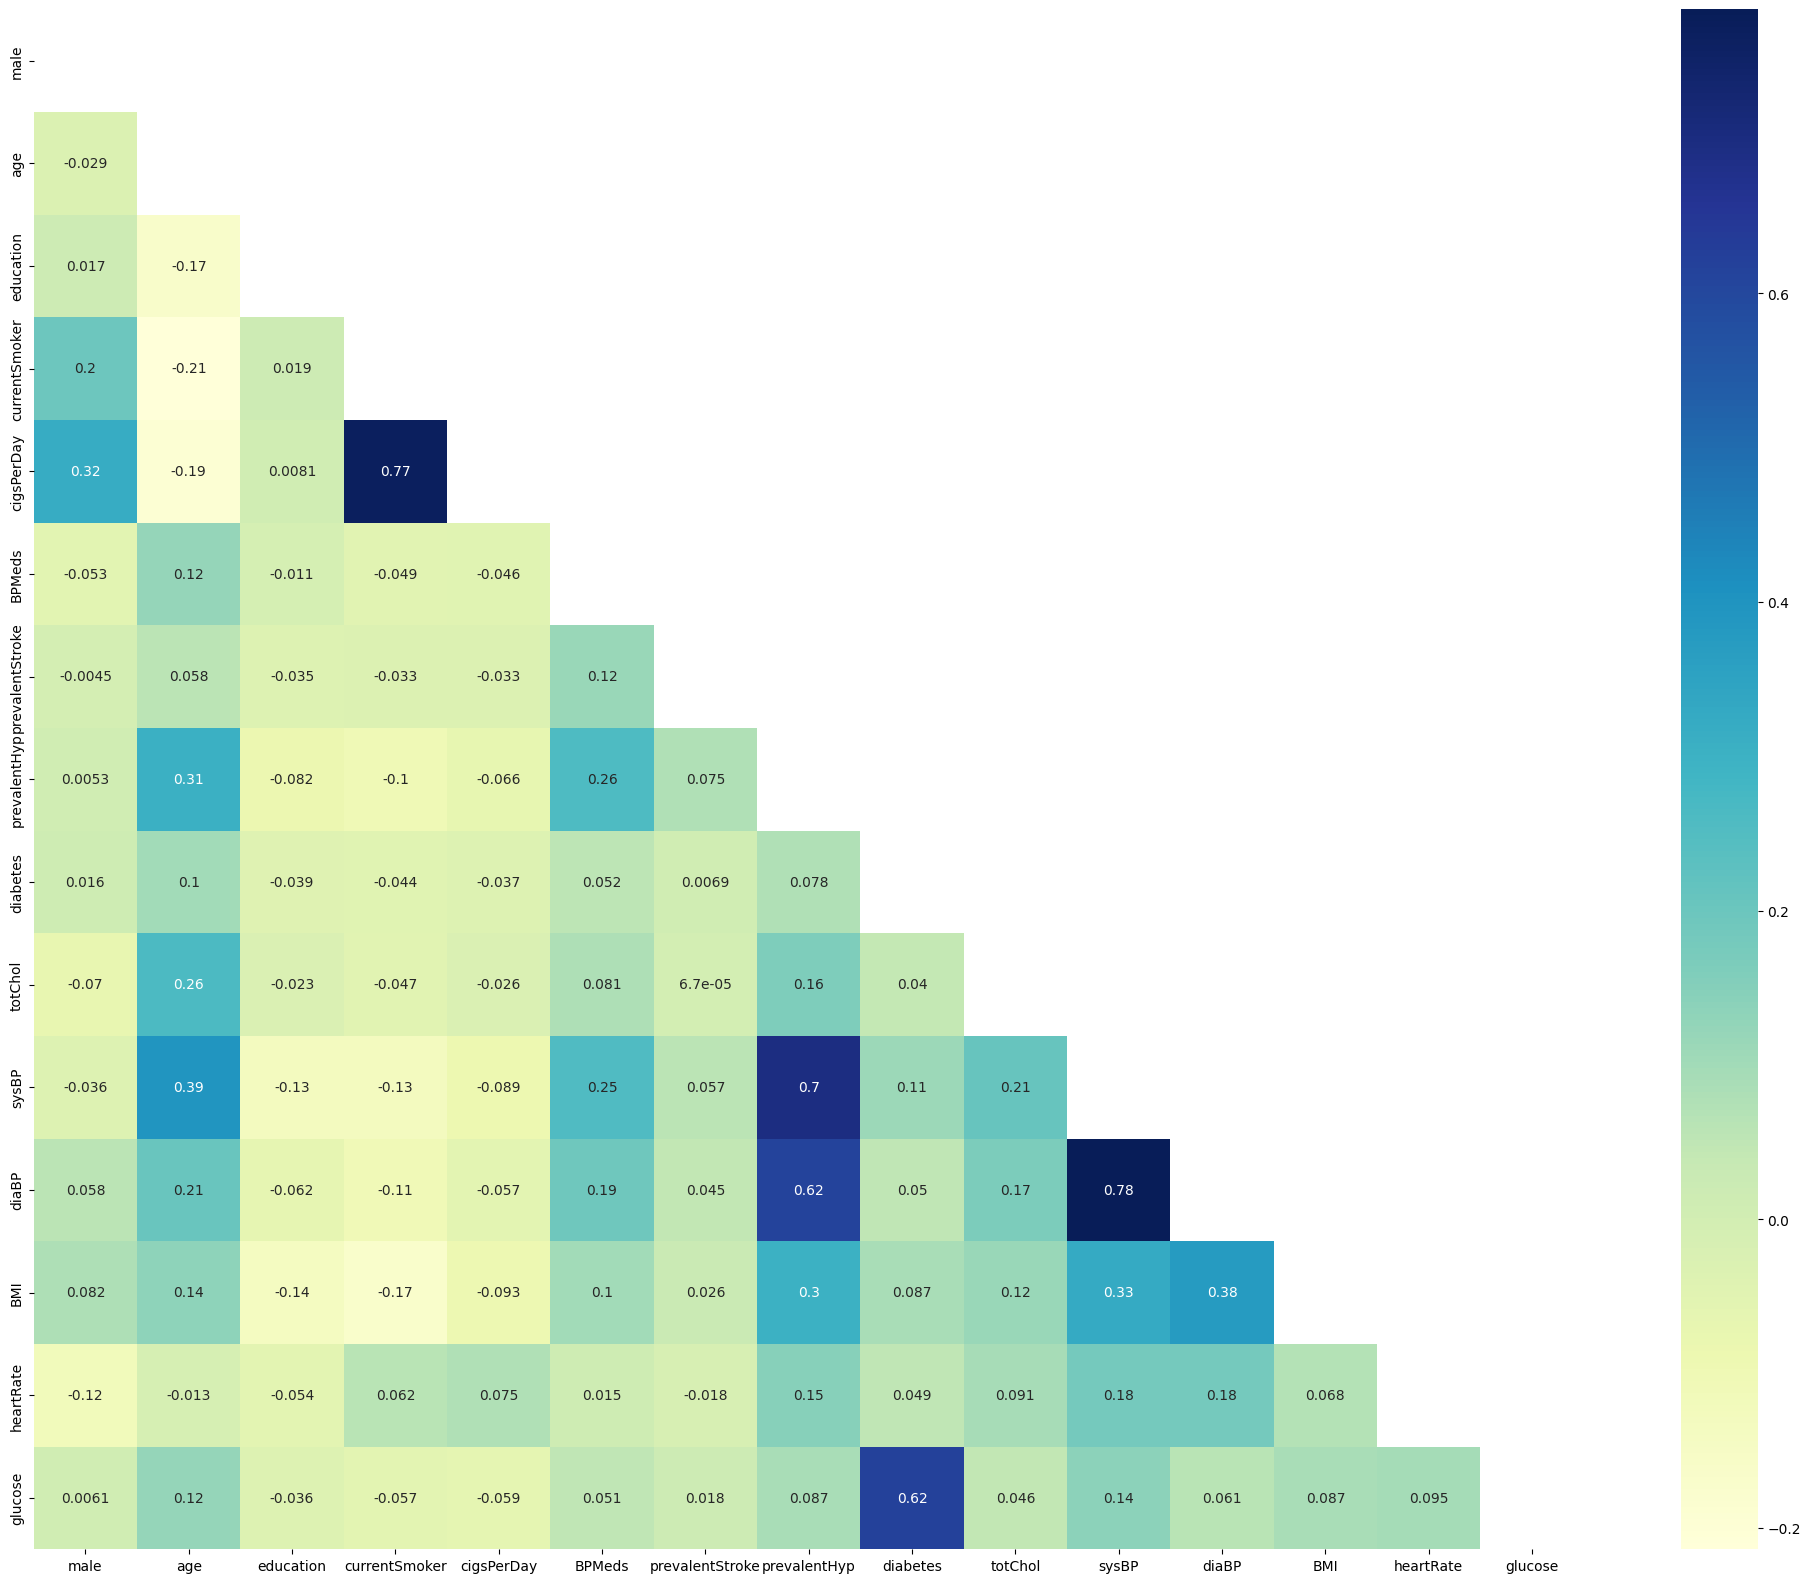

In [12]:
corr = dataset.drop(columns='TenYearCHD').corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(25, 20))

sns.heatmap(corr, annot=True, mask=mask, ax=ax, cmap="YlGnBu")

plt.show()


In [13]:
corr

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408


**Count of TenYearCHD:**

In [14]:
pd.DataFrame({
    '0': (dataset['TenYearCHD']==0).sum(),
    '1': (dataset['TenYearCHD']==1).sum()
}, index=['TenYearCHD'])

,0,1
TenYearCHD,3594,644


> Dataset is not balanced

# Split

In [15]:
df = dataset.copy()

In [16]:
df.drop(columns = 'education', inplace = True)

In [17]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2966, 14)
y_train shape: (2966,)
X_test shape: (1272, 14)
y_test shape: (1272,)


In [19]:
pd.DataFrame({
    '0': (y_train==0).sum(),
    '1': (y_train==1).sum()
}, index=['TenYearCHD'])

,0,1
TenYearCHD,2510,456


In [20]:
pd.DataFrame({
    '0': (y_test==0).sum(),
    '1': (y_test==1).sum()
}, index=['TenYearCHD'])

,0,1
TenYearCHD,1084,188


# Data Preprocessing

**Replace values with NaN or null values:**

In [21]:
# Numeric features
num_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
imputer_num = SimpleImputer(strategy='mean')
X_train[num_features] = imputer_num.fit_transform(X_train[num_features])
X_test[num_features] = imputer_num.transform(X_test[num_features])



In [22]:
# Categorical features
cat_features = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
imputer_cat = SimpleImputer(strategy='most_frequent')
X_train[cat_features] = imputer_cat.fit_transform(X_train[cat_features])
X_test[cat_features] = imputer_cat.transform(X_test[cat_features])


**Check:**

In [23]:
pd.DataFrame({
    'null': X_train.isnull().sum(),
    'inf': np.isinf(X_train).sum()
})

,null,inf
male,0,0
age,0,0
currentSmoker,0,0
cigsPerDay,0,0
BPMeds,0,0
prevalentStroke,0,0
prevalentHyp,0,0
diabetes,0,0
totChol,0,0
sysBP,0,0


In [24]:
pd.DataFrame({
    'null': X_test.isnull().sum(),
    'inf': np.isinf(X_test).sum()
})

,null,inf
male,0,0
age,0,0
currentSmoker,0,0
cigsPerDay,0,0
BPMeds,0,0
prevalentStroke,0,0
prevalentHyp,0,0
diabetes,0,0
totChol,0,0
sysBP,0,0


In [25]:
smote = SMOTE(random_state=42, sampling_strategy=0.2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# X_train_resampled, y_train_resampled = X_train, y_train 

In [26]:
pd.DataFrame({
    '0': (y_train_resampled==0).sum(),
    '1': (y_train_resampled==1).sum()
}, index=['TenYearCHD'])

,0,1
TenYearCHD,2510,502


## Scaling Numerical Features

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled[num_features])
X_test_scaled = scaler.transform(X_test[num_features])

In [28]:
X_train_scaled

array([[-8.98490710e-01, -1.58839281e-02,  8.13582494e-01, ...,
        -8.91346342e-01, -5.05100399e-01,  8.04104948e-04],
       [ 1.68344437e+00, -7.74843293e-01,  1.05802333e+00, ...,
         1.00084422e+00, -9.27153900e-01,  2.22329014e-01],
       [-1.25057277e+00, -7.74843293e-01, -7.19728180e-01, ...,
        -1.29021427e+00, -6.73921799e-01,  8.04104948e-04],
       ...,
       [-2.46431161e-03, -6.71447169e-01, -9.31898083e-01, ...,
         4.84028788e-01, -8.30468971e-02,  1.79758863e-01],
       [-3.82626104e-01, -7.74843293e-01,  1.94860900e+00, ...,
        -2.73425849e-01, -2.73205809e-01, -3.23001682e-01],
       [ 1.63795938e+00, -6.49083696e-02, -1.01564091e+00, ...,
        -6.68062464e-01, -4.53404394e-01, -4.84326441e-01]])

## Encoding Categorical Variables

In [29]:
# encoder = OneHotEncoder(handle_unknown='ignore')
# X_train_encoded = encoder.fit_transform(X_train[cat_features])
# X_test_encoded = encoder.transform(X_test[cat_features])
# # Note: Now X_train_encoded and X_test_encoded are sparse matrices.


In [30]:
X_train_categorical = X_train_resampled[cat_features].values
X_test_categorical = X_test[cat_features].values


**Combine Encoded and Scaled Features:**

In [31]:
X_train_prepared = np.hstack([X_train_scaled, X_train_categorical])
X_test_prepared = np.hstack([X_test_scaled, X_test_categorical])


# Model

**Setting parameters of logistic regression:**

In [32]:
parameters = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
logreg = LogisticRegression(solver='liblinear')
clf = GridSearchCV(logreg, parameters, cv=5)
clf.fit(X_train_resampled, y_train_resampled)
print("Best parameters:", clf.best_params_)

Best parameters: {'C': 10, 'penalty': 'l1'}


**Model:**

In [33]:
model = LogisticRegression(C=10, penalty='l1', solver='liblinear') 
model.fit(X_train_prepared, y_train_resampled)


LogisticRegression(C=10, penalty='l1', solver='liblinear')

**Prediction:**

In [34]:
predictions = model.predict(X_test_prepared)
predictions

array([0, 0, 0, ..., 0, 0, 0])

**Accuracy:**

In [35]:
testing_acc = accuracy_score(y_test, predictions)   6

print(f"Testing accuracy : {testing_acc: .4f}")

Testing accuracy :  0.8608


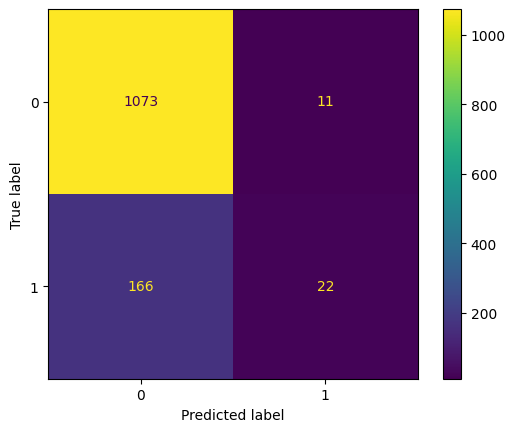

In [36]:
ConfusionMatrixDisplay.from_estimator(model,X_test_prepared,y_test)

In [37]:
print(classification_report(y_test ,predictions))


              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1084
           1       0.67      0.12      0.20       188

    accuracy                           0.86      1272
   macro avg       0.77      0.55      0.56      1272
weighted avg       0.84      0.86      0.82      1272

